Exited = 1 means customer stays </br> Exited = 0 means customer leaves

Scroll to bottom to see eda conclusion and model implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
plt.style.use('dark_background')
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv(r"./Churn_Modelling.csv")
df.drop_duplicates(inplace=True)
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


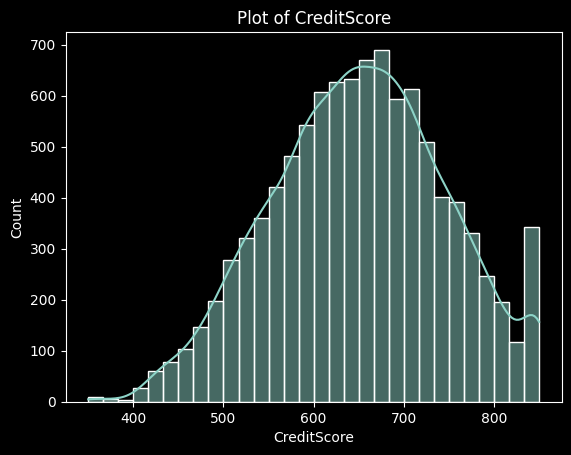

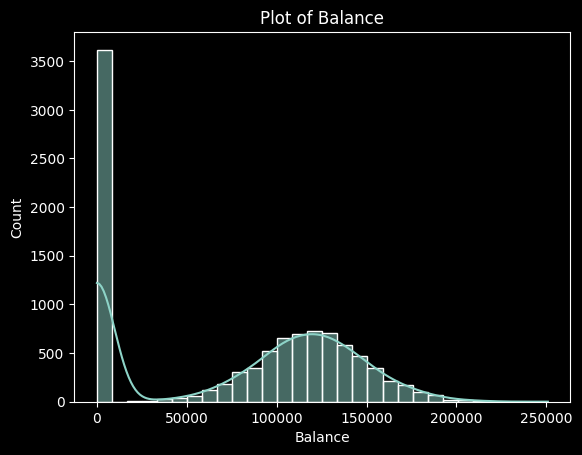

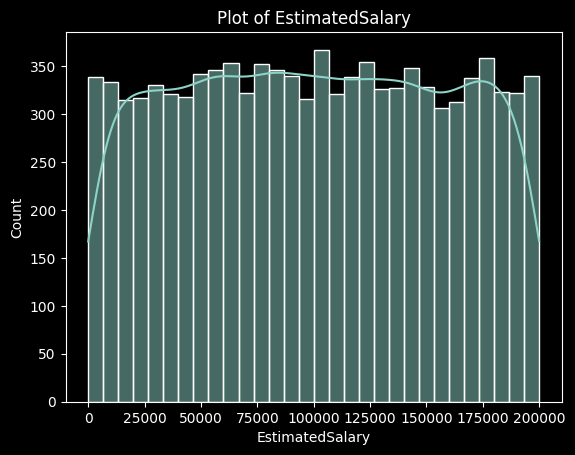

In [5]:
for col in ['CreditScore','Balance','EstimatedSalary']:
    sns.histplot(df[col],bins=30,kde=True)
    plt.title(f'Plot of {col}')
    plt.show()

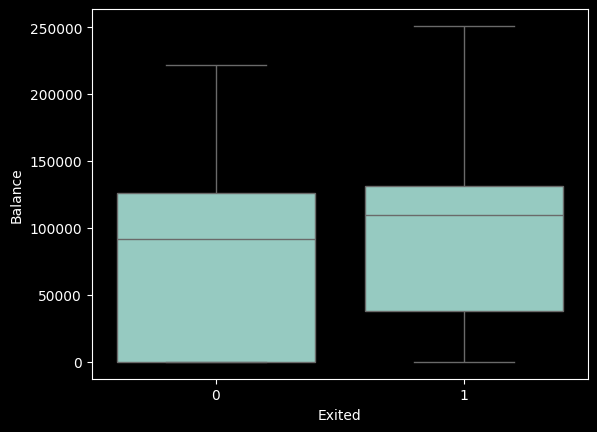

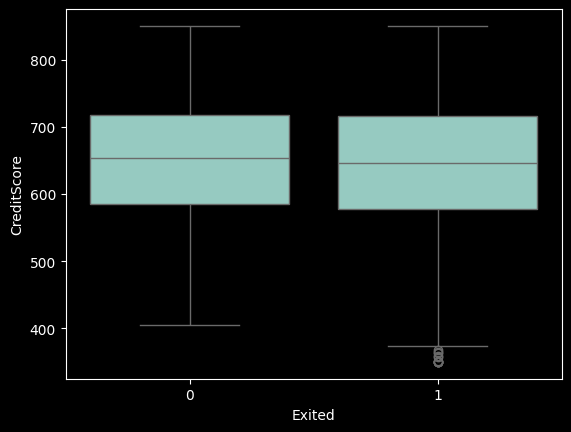

In [6]:
sns.boxplot(x='Exited',y='Balance',data=df)
plt.show()
sns.boxplot(x='Exited',y='CreditScore',data=df)
plt.show()

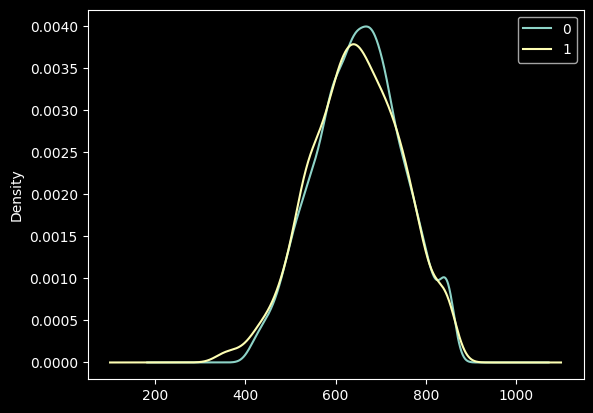

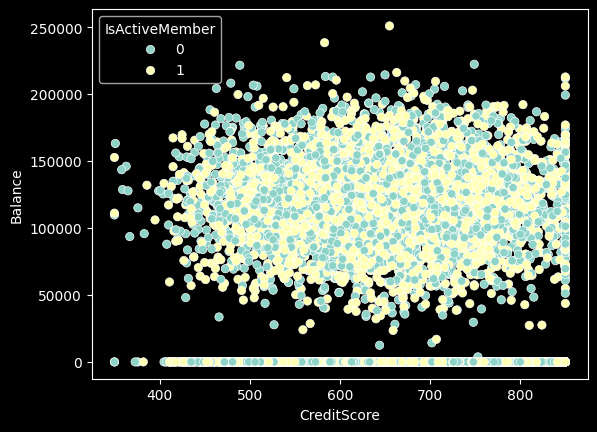

In [7]:
df[df['NumOfProducts']<3].groupby('Exited')['CreditScore'].plot(kind='kde')
plt.legend()
plt.show()
sns.scatterplot(x='CreditScore',y='Balance',hue='IsActiveMember',data=df)
plt.show()

In [8]:
pd.crosstab(df['HasCrCard'],df['Exited'], normalize='index')

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798157,0.201843


In [9]:
pd.crosstab(df['IsActiveMember'],df['Exited'], normalize='index')

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


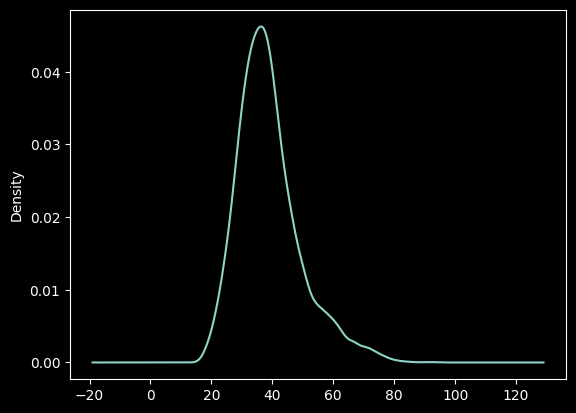

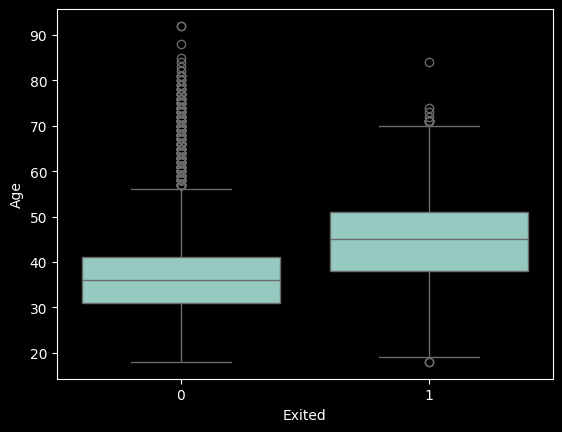

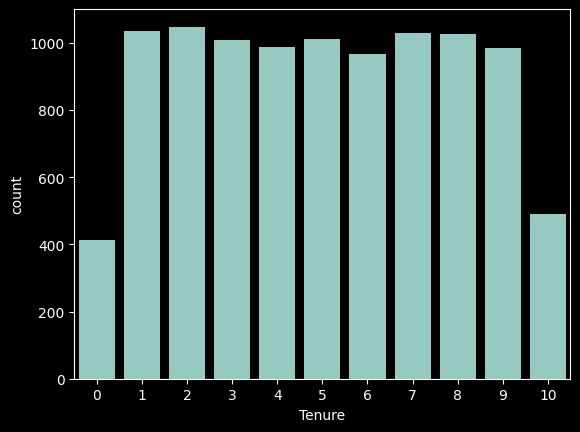

In [10]:
df['Age'].plot(kind='kde')
plt.show()
sns.boxplot(x='Exited',y='Age',data=df)
plt.show()
sns.countplot(x='Tenure',data=df)
plt.show()


In [11]:
pd.crosstab(df['Tenure'],df['Exited'],normalize='index')

Exited,0,1
Tenure,,
0,0.769976,0.230024
1,0.775845,0.224155
2,0.808206,0.191794
3,0.788900,0.211100
4,0.794742,0.205258
5,0.793478,0.206522
6,0.797311,0.202689
7,0.827821,0.172179
8,0.807805,0.192195


<Axes: xlabel='Tenure', ylabel='Age'>

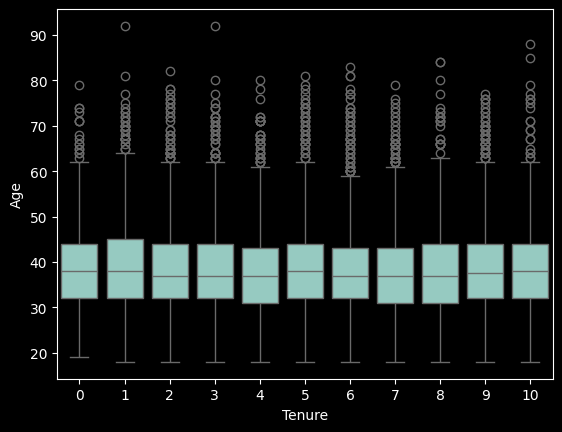

In [12]:
sns.boxplot(x='Tenure',y='Age',data=df)

In [13]:
df[df['NumOfProducts']>2]['Tenure'].value_counts()

Tenure
3     50
5     43
1     36
9     33
8     32
2     32
7     29
4     23
6     21
10    21
0      6
Name: count, dtype: int64

In [14]:
print(pd.crosstab(df['Gender'],df['Exited'],normalize='index'))
print()
print(pd.crosstab(df['Geography'],df['Exited'],normalize='index'))

Exited         0         1
Gender                    
Female  0.749285  0.250715
Male    0.835441  0.164559

Exited            0         1
Geography                    
France     0.838452  0.161548
Germany    0.675568  0.324432
Spain      0.833266  0.166734


In [15]:
dfGer = df[df['Geography']=='Germany']
dfGer[dfGer['NumOfProducts']==1].groupby('Exited')['Gender'].value_counts()

Exited  Gender
0       Male      420
        Female    351
1       Female    313
        Male      265
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

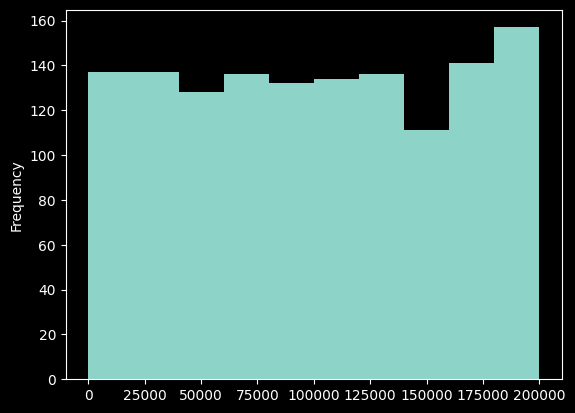

In [16]:
dfGer[dfGer['NumOfProducts']==1]['EstimatedSalary'].plot(kind='hist')

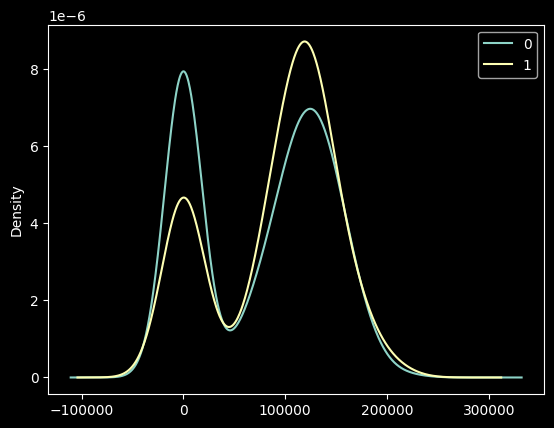

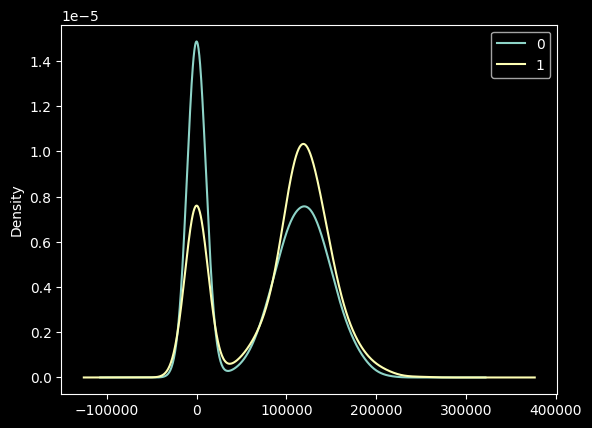

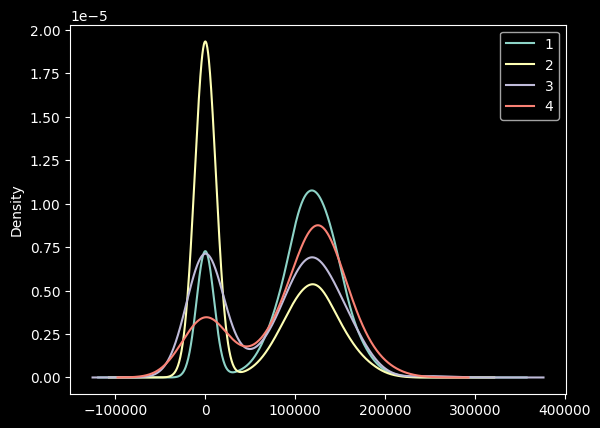

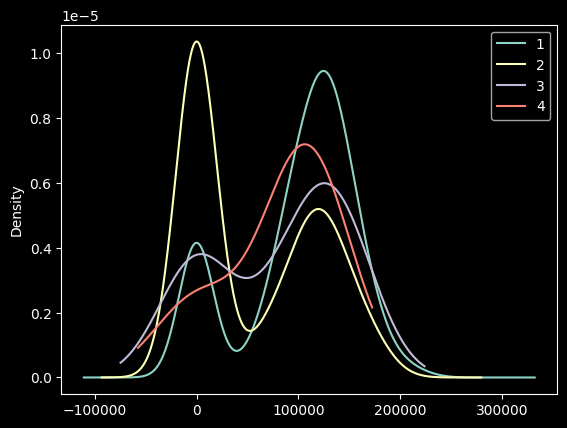

In [17]:
dfc = df[df['CreditScore']<500]
dfc.groupby('Exited')['Balance'].plot(kind='kde')
plt.legend()
plt.show()
dfc = df[df['CreditScore']>500]
dfc.groupby('Exited')['Balance'].plot(kind='kde')
plt.legend()
plt.show()
dfc = df[df['CreditScore']>500]
dfc.groupby('NumOfProducts')['Balance'].plot(kind='kde')
plt.legend()
plt.show()
dfc = df[df['CreditScore']<500]
dfc.groupby('NumOfProducts')['Balance'].plot(kind='kde')
plt.legend()
plt.show()

# Conclusions
-Tenure and isActive and Estimated Salary doesn't have impact on Exited </br>
-Ppl above 40 age has less chances of churn than young people </br>
-Ppl with more than 2 products has less chances of churn </br>
-Germany has least churn rate, bcoz germany has most old people, above 40 age </br>
-Gender doesn't have much impact </br>
-Low credit and low balance have high churn, High credit and low balance have high churn </br>
-High Credit, High balance have low churn, Low Credit, High Balance have high churn </br>
-High Credit with low num of products plus low balance very high churn rate </br>
<b>Major Factor of Churn: </br>Are you Old? Do you have high credit? Do you have high balance? Do you own more than 2 products? Then you less likely to leave</b>

do standarization for normally distributed, while normalization for not

In [18]:
df[df['Balance']>50000].shape

(6308, 11)

In [19]:
def balance(row):
    if(row==0):
        return 1
    elif(row<100000 and row>=50000):
        return 2
    else:
        return 2
df['NumOfProducts']= np.where(df['NumOfProducts']==4,3,df['NumOfProducts'])
df['bal'] = df['Balance'].apply(balance)
df['Age_bin']= np.where(df['Age']<40,1,2)
import category_encoders as ce
encoder = ce.TargetEncoder()
df['Age_bin'] = df['Age_bin'].astype(str)
df['Age_bin'] = encoder.fit_transform(X=df['Age_bin'],y=df['Age'])
df['Balance'] = np.log1p(df['Balance'])
df['EstimatedSalary'] = np.log(df['EstimatedSalary'])
df['CreditScore'] = np.log(df['CreditScore'])
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#df['Geography'] = encoder.fit_transform(df['Geography'])
freq_encoding = df['Geography'].value_counts()  # Get the frequency
#df['Geography'] = df['Geography'].map(freq_encoding) 
df = pd.get_dummies(df,columns=['Geography'])
df['Gender'] = np.where(df['Gender']=='Male',1,0)
#df['Age'] = np.log(df['Age'])
df = df.drop(columns=['Gender'])

In [20]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal,Age_bin,Geography_France,Geography_Germany,Geography_Spain
0,6.428105,42,2,0.000000,1,1,1,11.526324,1,1,48.807625,True,False,False
1,6.410175,41,1,11.336294,1,0,1,11.631087,0,2,48.807625,False,False,True
2,6.218600,42,8,11.980813,3,1,0,11.643353,1,2,48.807625,True,False,False
3,6.549651,39,1,0.000000,2,0,0,11.449204,0,1,32.295474,True,False,False
4,6.745236,43,2,11.740155,1,1,1,11.278267,0,2,48.807625,False,False,True


In [21]:
x = df.drop(columns=['Exited','Age','Balance'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))


Accuracy: 83.20%
Precision: 0.65
Recall: 0.23
F1 Score: 0.34
Confusion Matrix:
[[789  23]
 [145  43]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       812
           1       0.65      0.23      0.34       188

    accuracy                           0.83      1000
   macro avg       0.75      0.60      0.62      1000
weighted avg       0.81      0.83      0.80      1000



In [23]:
x = df.drop(columns=['Exited','Balance'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfg = RandomForestClassifier(random_state=2,n_jobs=-1)
params = {
    'max_depth':[2,3,4,7,9,11],
    'n_estimators':[5,10,15,20],
    'oob_score':[True],
}
rfg = GridSearchCV(rfg,param_grid=params,n_jobs=-1)
rfg.fit(x_train,y_train)
y_pred = rfg.best_estimator_.predict(x_test)
print("Best params: ",rfg.best_params_)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))
print("OOB score: ",rfg.best_estimator_.oob_score_)
featureImps = rfg.best_estimator_.feature_importances_
featImps = [f"{value:.10f}" for value in featureImps]
print("feature Importance: ",)
cols = np.array(x.columns)
for (a,b) in zip(cols,featImps):
    print((a,b))


Best params:  {'max_depth': 9, 'n_estimators': 15, 'oob_score': True}
Accuracy: 86.80%
Precision: 0.77
Recall: 0.43
F1 Score: 0.55
Confusion Matrix:
[[788  24]
 [108  80]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       812
           1       0.77      0.43      0.55       188

    accuracy                           0.87      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.86      0.87      0.85      1000

OOB score:  0.8565555555555555
feature Importance: 
('CreditScore', '0.0813854166')
('Age', '0.2867566590')
('Tenure', '0.0397003461')
('NumOfProducts', '0.2636640419')
('HasCrCard', '0.0089902665')
('IsActiveMember', '0.0750398197')
('EstimatedSalary', '0.0658548918')
('bal', '0.0247519639')
('Age_bin', '0.0965432291')
('Geography_France', '0.0116667349')
('Geography_Germany', '0.0352292943')
('Geography_Spain', '0.0104173362')


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [25]:
x = df.drop(columns=['Exited','Balance','Age','EstimatedSalary'])
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [26]:
from sklearn.naive_bayes import BernoulliNB
NaBys = BernoulliNB()
NaBys.fit(x_train,y_train)
y_pred = NaBys.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred))


Accuracy: 81.40%
Precision: 0.67
Recall: 0.02
F1 Score: 0.04
Confusion Matrix:
[[810   2]
 [184   4]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       812
           1       0.67      0.02      0.04       188

    accuracy                           0.81      1000
   macro avg       0.74      0.51      0.47      1000
weighted avg       0.79      0.81      0.74      1000



use different threshold for class for better recall or do over/under sampling, or use SMOTE